# Kaggle Digit Recognizer

Train a model on the MNIST data set to predict the digits in the test set

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import multilayer_perceptron
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
dftrain = pd.read_csv('train.csv')

In [3]:
dftrain.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dftrain.shape

(42000, 785)

The images are gray-scale with 28 pixles in height and 28 pixels in width. So we have a total of 784 features. The pixel value is between 0 and 255 inclusive with higher numbers meaning darker. 

To understand this, we look at one particular row and reconstruct the image. 

In [23]:
im0 = dftrain.iloc[0, :].values[1:] #droping the value in the label column

In [13]:
im0sq = im0.reshape(28, 28)

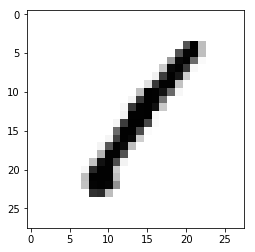

In [22]:
plt.imshow(im0sq, cmap = 'Greys');

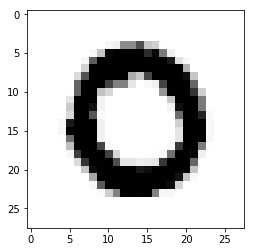

In [26]:
im1 = dftrain.iloc[1, :].values[1:] #droping the value in the label column
im1sq = im1.reshape(28, 28)
plt.imshow(im1sq, cmap = 'Greys');

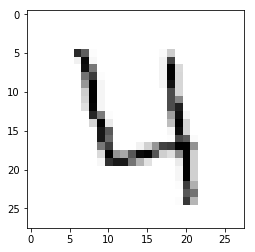

In [32]:
im3 = dftrain.iloc[3, :].values[1:] #droping the value in the label column
im3sq = im3.reshape(28, 28)
plt.imshow(im3sq, cmap = 'Greys');

In [45]:
dftrain.isnull().values.sum()

0

No missing values at all. We have done data explorations. The features are decided, we can dive right into machine learning. 

Note that this is a multiclass classification problem. 